### `init-weights-2`: Fitting efficiency of zero-weights
In this notebook, we compare learners based on init conditions

In [2]:
import os, sys
import copy as copyroot
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from fastai.basics import *
from fastai.vision.all import *
import torch
from module2.mnist_helpers import build_dls
from module2.mnist_models import FeatsNet, zero_p

### Traditional Workflow

In [33]:
dls_tl =   build_dls(target='topleft')
dls_tl_2 = build_dls(target='topleft')

In [34]:
fn_rand = FeatsNet(feats=['pix', 'pts11', 'pts12', 'pts22'])

fn_zero = FeatsNet(feats=['pix', 'pts11', 'pts12', 'pts22'])
fn_zero = zero_p(fn_zero)

In [35]:
learn_rand = Learner(
                dls_tl, 
                fn_rand,
                loss_func=MSELossFlat(), 
                y_range=(-1.,1.),
                metrics=[R2Score()],             
               )

learn_zero = Learner(
                dls_tl_2, 
                fn_zero,
                loss_func=MSELossFlat(), 
                y_range=(-1.,1.),
                metrics=[R2Score()],             
               )

In [36]:
learn_rand.fit(10)

epoch,train_loss,valid_loss,r2_score,time
0,0.107882,0.038562,0.242999,00:03
1,0.075219,0.051592,-0.012787,00:03
2,0.061417,0.031668,0.378351,00:03
3,0.049062,0.022387,0.560523,00:03
4,0.041231,0.022399,0.560297,00:03
5,0.035331,0.018153,0.643649,00:03
6,0.030667,0.018925,0.628502,00:03
7,0.027049,0.015941,0.687070,00:03
8,0.024116,0.017057,0.665153,00:03
9,0.021784,0.014391,0.717498,00:03


In [37]:
learn_zero.fit(10)

epoch,train_loss,valid_loss,r2_score,time
0,0.245551,0.210980,-3.141655,00:03
1,0.196315,0.074040,-0.453441,00:03
2,0.143133,0.042535,0.165009,00:03
3,0.113816,0.039090,0.232646,00:03
4,0.095255,0.037464,0.264564,00:03
5,0.081329,0.030487,0.401526,00:03
6,0.071519,0.030278,0.405619,00:03
7,0.064270,0.029559,0.419746,00:03
8,0.058329,0.029035,0.430029,00:05
9,0.053810,0.028979,0.431136,00:04


<Strikethrough> Wow, the zero'd model is the truth! </Strikethrough>

Never mind: the first time thru, something went wrong, it's unclear if the zero-init is even beneficial.

### Check Distirbution of Params
OK, it's not what we expected: it's almost uniform distribution for the zero-init'd model, instead of bi-variate.

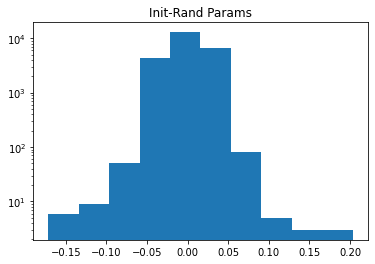

In [74]:
learner = learn_rand

params = [p for p in learner.model.state_dict().values()]
params = torch.cat([p.flatten() for p in params])

plt.hist(params.numpy(), log=True);
plt.title('Init-Rand Params');

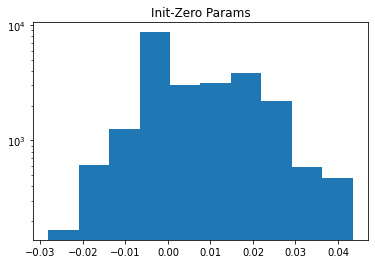

In [75]:
learner = learn_zero

params = [p for p in learner.model.state_dict().values()]
params = torch.cat([p.flatten() for p in params])

plt.hist(params.numpy(),log=True);
plt.title('Init-Zero Params');